# Modules for Import

In [1]:
import pandas as pd

# !pip install pandasai
# !pip install langchain_community
# !pip install langchain_openai

import os
from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.helpers.openai_info import get_openai_callback
import logging
import openai

from langchain_openai.chat_models import ChatOpenAI

# Create a custom logging configuration
logging.basicConfig(level=logging.CRITICAL)

# Read NBA Stats Data CSV from disk 

In [2]:
# Load your data into a pandas DataFrame
df = pd.read_csv('nba-stats-data.csv', low_memory=False)
# set season (year) as main DF index to allow for time series analysis of player data
df = df.reset_index().set_index('season')
df.index = pd.to_datetime(df.index, format='%Y').to_period('Y')
df = df.sort_index(axis=0)
df.head()

,index,assists,blocks,comment,defReb,fga,fgm,fgp,fta,ftm,...,DOB,age,feet,meters,position,active,jersey_number,years_pro,rookie_year,pounds
season,,,,,,,,,,,,,,,,,,,,,
2015,34,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,35,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,36,2.0,0.0,NaN,7.0,7.0,3.0,42.9,2.0,2.0,...,1988-07-16,36.0,"6""7",2.01,F,True,1.0,9.0,2012.0,237.0
2015,37,0.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,38,1.0,1.0,NaN,5.0,5.0,3.0,60.0,6.0,2.0,...,1992-03-22,33.0,"7""3",2.21,C,False,40.0,1.0,2015.0,265.0


# Analysis: Speak to the Data!

In [3]:
df.columns

Index(['index', 'assists', 'blocks', 'comment', 'defReb', 'fga', 'fgm', 'fgp',
       'fta', 'ftm', 'ftp', 'min', 'offReb', 'pFouls', 'plusMinus', 'points',
       'pos', 'steals', 'totReb', 'tpa', 'tpm', 'tpp', 'turnovers',
       'player_id', 'player_name', 'team_code', 'team_name', 'team_id',
       'game_id', 'affiliation', 'college', 'firstname', 'id', 'lastname',
       'country', 'DOB', 'age', 'feet', 'meters', 'position', 'active',
       'jersey_number', 'years_pro', 'rookie_year', 'pounds'],
      dtype='object')

## Set Open AI API Key

In [4]:
os.environ["OPENAI_API_KEY"] = "*******"

llm = OpenAI(model="gpt-4o", openai_api_key=openai.api_key)

# Set Large Language Model & other DF confirgurations

In [5]:
df_nba = SmartDataframe(df, config={"llm": llm, "conversational": True, "verbose": True})

In [6]:
df_nba.chat("Which are the top 20 player_names by assists?")

,player_name,assists
season,,
2017,Rajon Rondo,25.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0


# Chat with (query data)

In [7]:
df_nba.chat("Which are the top 10 player_names by assists?")

,player_name,assists
season,,
2017,Rajon Rondo,25.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0


In [8]:
df_nba.chat("Which are the top 5 player_names group by points?")

,player_name,points
1167,Kevin Durant,35170.0
1669,Russell Westbrook,33398.0
1220,Kyrie Irving,29574.0
78,Andre Drummond,27846.0
1497,Nikola Vucevic,27172.0


In [9]:
df_nba.chat("Which are the top 5 player_names group by blocks?")

,player_name,blocks
0,JaVale McGee,2648.0
1,Andre Drummond,2478.0
2,Mason Plumlee,1866.0
3,Kevin Durant,1640.0
4,Rudy Gobert,1586.0


In [10]:
df_nba.chat("Which are the top 5 player_names group by assists?")

,player_name,assists
0,Russell Westbrook,13532.0
1,Kyle Lowry,9276.0
2,Eric Bledsoe,7404.0
3,James Harden,6952.0
4,Kyrie Irving,6658.0


In [11]:
df_nba.chat("Which are the top 5 distinct player_names by pounds?")

,player_name,pounds
season,,
2015,Jusuf Nurkic,290.0
2015,Boban Marjanovic,290.0
2019,Zion Williamson,284.0
2015,Nikola Jokic,284.0
2015,Joel Embiid,280.0


In [12]:
df_nba.chat("Which are the top 5 distinct player_names by meters?")

,player_name,meters
season,,
2017,Boban Marjanovic,2.21
2015,Edy Tavares,2.21
2017,Kristaps Porzingis,2.21
2021,Bol Bol,2.18
2021,Rudy Gobert,2.16


In [13]:
df_nba.chat("Which are the top 5 player_names group by plusMinus?")

,player_name,plusMinus
1167,Kevin Durant,8420.0
1763,Stephen Curry,5453.0
1220,Kyrie Irving,5234.0
401,Danny Green,5004.0
1214,Kyle Lowry,4852.0


In [14]:
df_nba.chat("Which are the top 5 player_names by all stats excluding pFouls and turnovers?")

<string>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


{'type': 'dataframe', 'value':            player_name  total_stats
season                             
2024     Jaylen Nowell    416102.93
2024     Jaylen Nowell    416101.93
2024     Jaylen Nowell    416100.93
2024    Kira Lewis Jr.    415965.85
2024     Jaylen Nowell    414590.93}


,player_name,total_stats
season,,
2024,Jaylen Nowell,416102.93
2024,Jaylen Nowell,416101.93
2024,Jaylen Nowell,416100.93
2024,Kira Lewis Jr.,415965.85
2024,Jaylen Nowell,414590.93


In [15]:
df_nba.chat("Which are the best players by single game stats?")

<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,player_name,points,assists,totReb,steals,blocks,composite_score
season,,,,,,,
2022,Luka Doncic,60.0,10.0,21.0,2.0,1.0,106.2
2023,Joel Embiid,70.0,5.0,18.0,1.0,1.0,103.1
2022,Joel Embiid,59.0,8.0,11.0,1.0,7.0,100.2
2022,Donovan Mitchell,71.0,11.0,8.0,0.0,1.0,99.1
2017,James Harden,60.0,11.0,10.0,4.0,1.0,98.5


'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

<Figure size 1000x600 with 0 Axes>

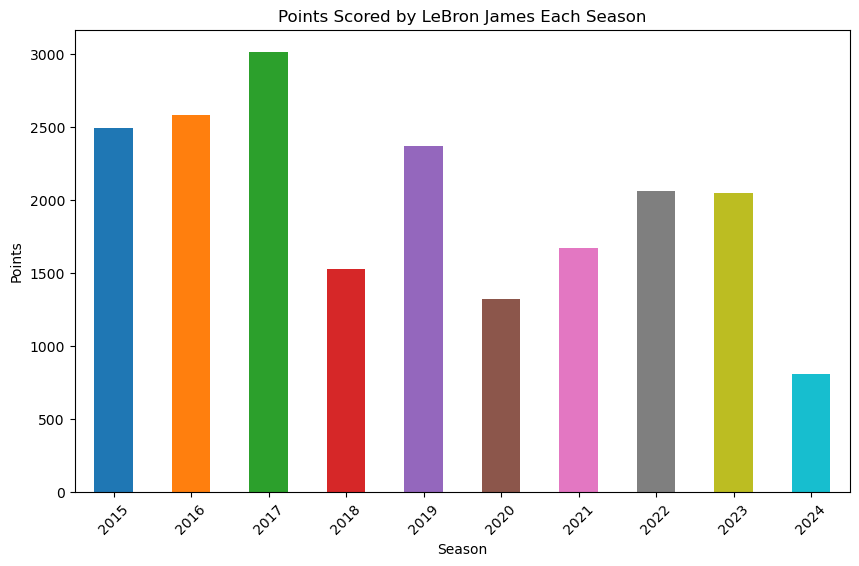

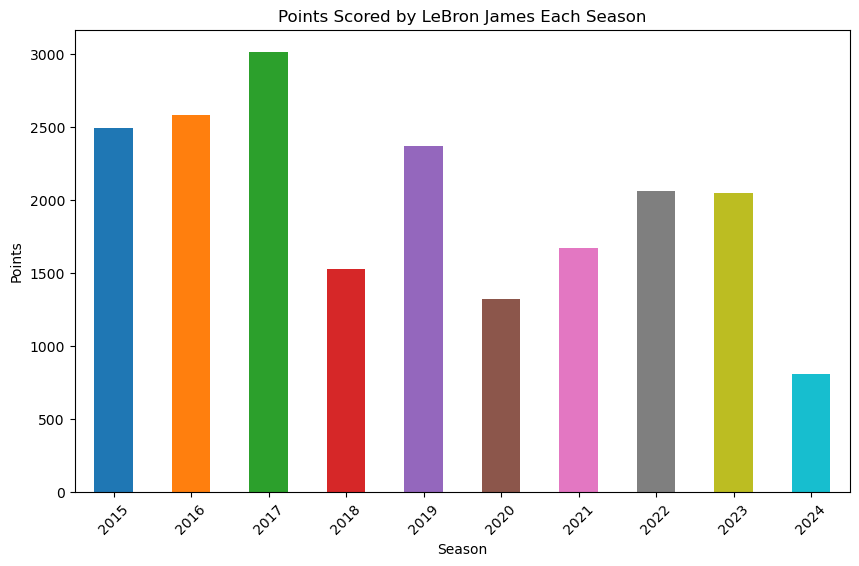

In [19]:
df_nba.chat("Plot points scored by LeBron James for each season, using different colors for each bar")

<string>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

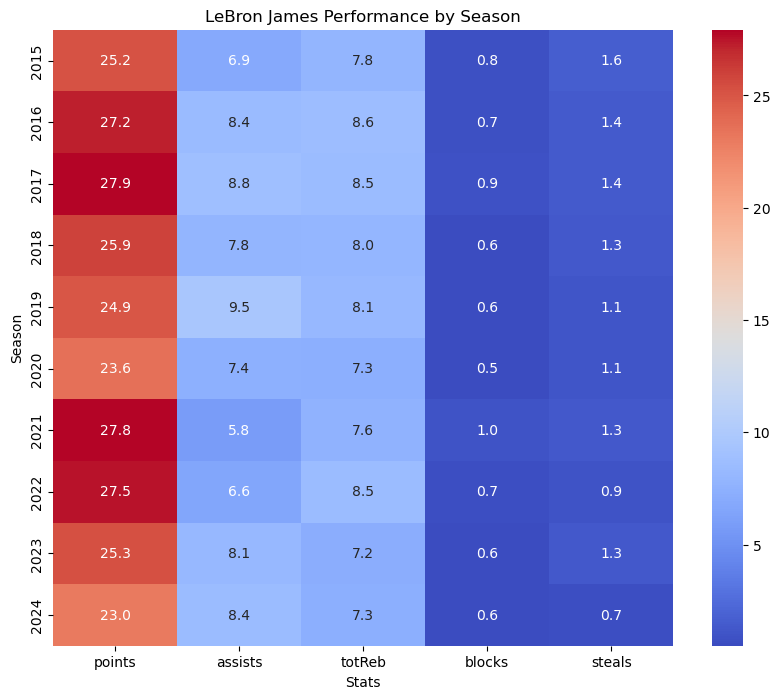

In [20]:
df_nba.chat("Plot heatmap of Lebron James performance by season")

'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

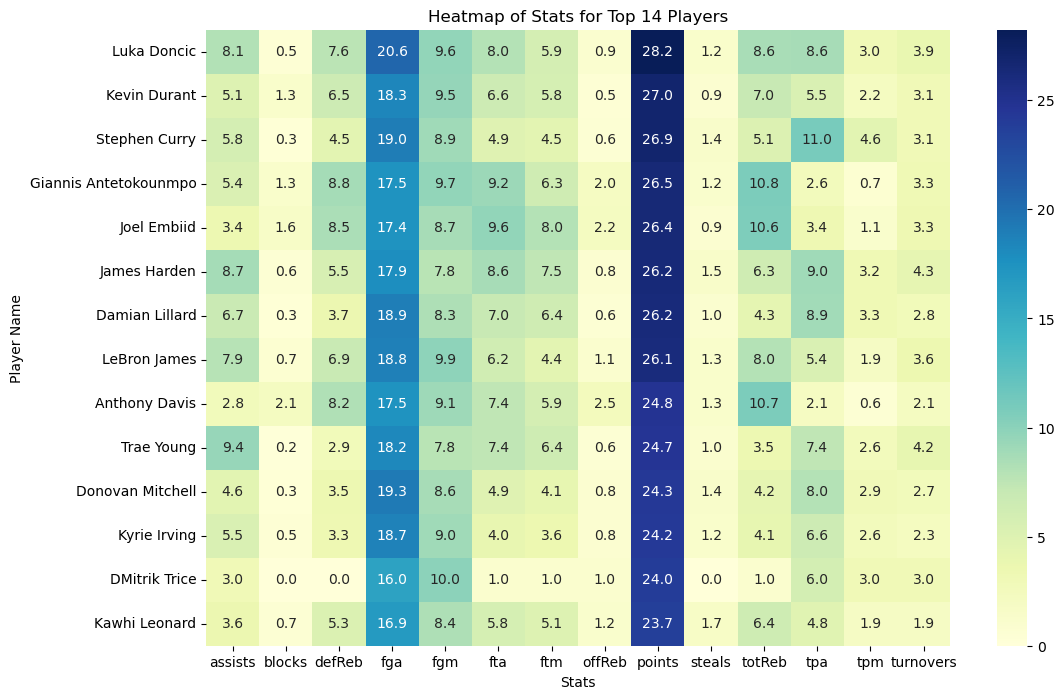

In [18]:
df_nba.chat("Plot heatmap of the best 14 players by player_name and stats")